In [1]:
import pandas as pd 
import numpy as np 
import ast 
import matplotlib.pyplot as plt 
%matplotlib inline
grid_chains=[]
description_chains=[]
df=pd.read_csv('data_grid7x7srb2.csv')
for nid in list(set(df.network_id)):
    grids=[]
    descriptions=[]
    df_nid=df[df.network_id==nid]
    for i in range(len(df_nid)):
        d=ast.literal_eval(df_nid.iloc[i].definition)
        if d['node_type']=='reconstruct':
            grids.append(d['grid_state'])
            descriptions.append(d['grid_description'])
    grid_chains.append(np.asarray(grids))
    description_chains.append(np.asarray(descriptions))
human_multimodal_grid_chains=np.asarray(grid_chains,dtype=np.object_)
human_multimodal_description_chains=np.asarray(description_chains,dtype=np.object_)

In [2]:
import uuid
print(uuid.uuid4())

801ba33f-b570-41d7-823c-d3c94add05fb


In [3]:

s="There are red tiles in the following (x,y) coordinates: "
for c in list(np.vstack(np.where(grid==1)).T):
    s+="("+str(c[0])+","+str(c[1])+'), '
print(s)

NameError: name 'grid' is not defined

In [10]:
from PIL import Image 
plt.ioff()
json_lst=[]
from tqdm import tqdm 
def make_sample(grid,lang):
    id=uuid.uuid4()
    plt.figure()
    plt.imshow(grid,cmap='bwr',vmin=-1,vmax=1)
    plt.axis('off')
    plt.savefig('grid_images/{}.png'.format(id))
    path='grid_images/{}.png'.format(id)
    img=Image.open(path).convert('RGB').resize((225,225))
    img.save(path)
    s="There are red tiles in the following (x,y) coordinates: "
    for c in list(np.vstack(np.where(grid==1)).T):
        s+="("+str(c[0])+","+str(c[1])+'), '

    conversations=[
        {
            "from": "human",
            "value": "<image>\nThis image is a 7x7 grid of red and white tiles. Describe the pattern this grid images."
        },
        {
            "from": "gpt",
            "value": lang
        },
        {
        "from":"human",
        "value": "Now list the location of all (x,y) coordinates for which there is a red tile. "
        },
        {
            "from": "gpt",
            "value": s
        }

    ]
    return dict(id=id,image=path,conversations=conversations)

for chain_id in tqdm(range(100)):
    for gen_id in range(len(human_multimodal_grid_chains[chain_id])):
        lang=human_multimodal_description_chains[chain_id][gen_id]
        grid=human_multimodal_grid_chains[chain_id][gen_id]
        json_lst.append(make_sample(grid,lang))
        

100%|██████████| 100/100 [00:53<00:00,  1.85it/s]


In [6]:
for sample in json_lst:
    sample['id']=str(sample['id'])

In [7]:
for sample in json_lst:
    sample['image']='/scratch/gpfs/sreejank/LLaVA/'+sample['image']

In [8]:
import json
with open('data.json', 'w') as f:
    json.dump(json_lst, f)

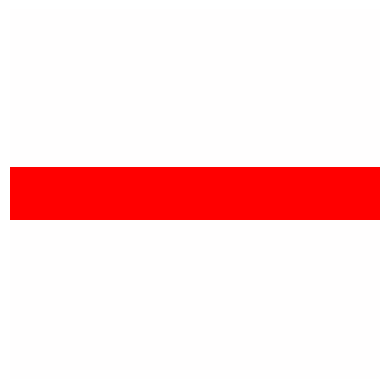

In [36]:
test_grid=np.zeros((7,7))
test_grid[3,:]=1
plt.figure()
plt.imshow(test_grid,cmap='bwr',vmin=-1)
plt.axis('off')
plt.savefig("test_grid.png")